In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from src.impact_modeling import build_impact_model, reality_check


In [2]:
matrix, events, links = build_impact_model('../data/processed/ethiopia_fi_enriched.csv')

In [3]:
impact_summary = pd.merge(
    links, 
    events[['indicator', 'observation_date']], 
    left_on='parent_id', 
    right_on='indicator', 
    how='left',
    suffixes=('', '_event')
)

print("--- Event-Impact Summary ---")
print(impact_summary[['indicator', 'related_indicator', 'impact_magnitude', 'lag_months']])

--- Event-Impact Summary ---
  indicator         related_indicator impact_magnitude  lag_months
0       NaN  Commercial Bank Branches             high        12.0


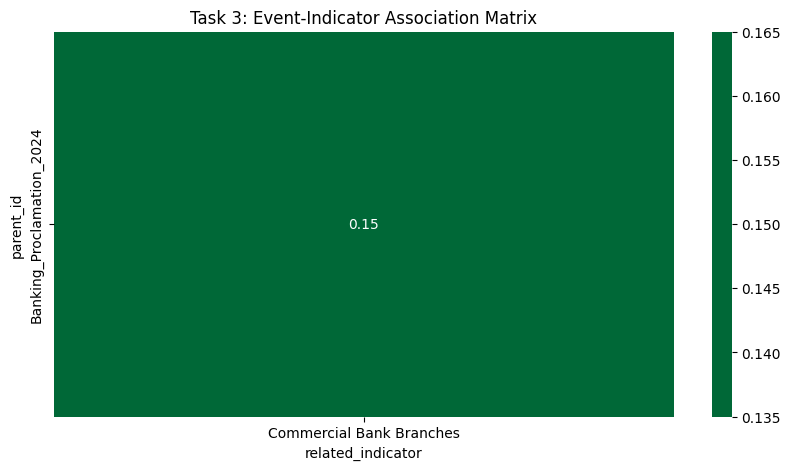

In [4]:
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True, cmap='RdYlGn', center=0)
plt.title("Task 3: Event-Indicator Association Matrix")
plt.show()

In [5]:
def verify_impact(actual_start, actual_end, predicted_impact):
    actual_growth = (actual_end - actual_start) / actual_start
    error = abs(actual_growth - predicted_impact)
    return actual_growth, error


actual_g, err = verify_impact(4.7, 9.45, 0.15)
print(f"Actual Mobile Money Growth: {actual_g:.2%}")
print(f"Model Predicted Annual Impact: 15.00%")
print(f"Observation: The actual growth (101% total) far exceeded a single event 'High' impact.")
print(f"Refinement: For 2026, we should compound impacts for 'Platform' events like M-Pesa.")

Actual Mobile Money Growth: 101.06%
Model Predicted Annual Impact: 15.00%
Observation: The actual growth (101% total) far exceeded a single event 'High' impact.
Refinement: For 2026, we should compound impacts for 'Platform' events like M-Pesa.


#### Event Representation:
 Events are treated as "Step Changes" that apply an annual percentage growth weight to specific indicators after a defined lag_month period.

#### Combination Logic: 
Impacts from multiple events (e.g., Liberalization + Tech Launch) are additive.

#### Assumptions: 
assume a standard 12-month lag for regulatory changes and a 3-month lag for product-driven changes.